#### Imports

In [1]:
import time

from tsp_util.TSPData import TSPData
from tsp_util.Maze import Maze
from tsp_util.PathSpecification import PathSpecification

from genetic.GeneticAlgorithm import GeneticAlgorithm

from aco.ACOConvergence import ACOConvergence
from aco.AntColonyOptimization import AntColonyOptimization
from aco.IntelligentAnt import IntelligentAnt

#### ACO Setup

In [2]:
ACO_PARAMS = {
    'ants_per_gen':16,
    'generations':256,
    'q':512,
    'evaporation':0.1,
    'elitism':2,
    'n_elite':2,
    'alpha':1,
    'beta':1,
    'alpha_increase':0.01,
    'alpha_beta_dev':2,
    'ant_class': IntelligentAnt,
    'convergence':ACOConvergence(
        max_iter=None, stagnation_threshold=32,
        quality_threshold=None, consistency_threshold=None
    )
}

# Construct the optimization objects
maze = Maze.create_maze(f"./../data/hard_maze.txt")
spec = PathSpecification.read_coordinates(f"./../data/hard_coordinates.txt")
aco = AntColonyOptimization(maze=maze, **ACO_PARAMS)

Ready reading maze file ./../data/hard_maze.txt


#### Genetic Algorithm

In [3]:
# GA parameters
population_size = 500
generations = 4000
seed = 42

persist_file = "./../data/optimal_tsp"
product_file = "./../data/tsp_products.txt"
coordinate_file = "./../data/hard_coordinates.txt"

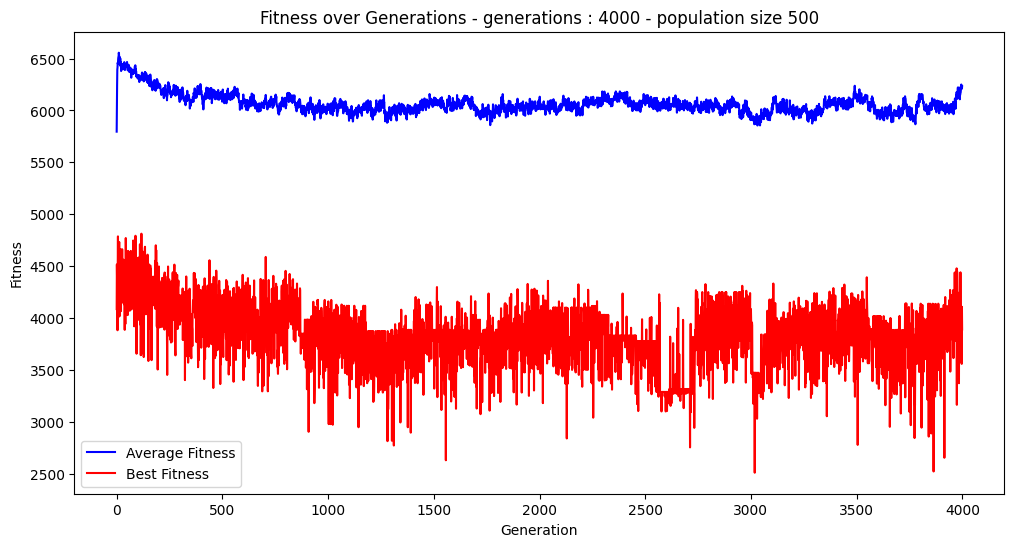

([1, 0, 4, 15, 13, 6, 8, 3, 11, 14, 12, 10, 5, 7, 9, 17, 16, 2], 2511)


In [4]:
# GA on pre optimized routes

tsp_data = TSPData.read_from_file(persist_file)
ga = GeneticAlgorithm(generations, population_size, seed)

solution = ga.solve_tsp(tsp_data, plot_avg=True, plot_best=True)
print(solution)

stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation convergence!
stagnation conve

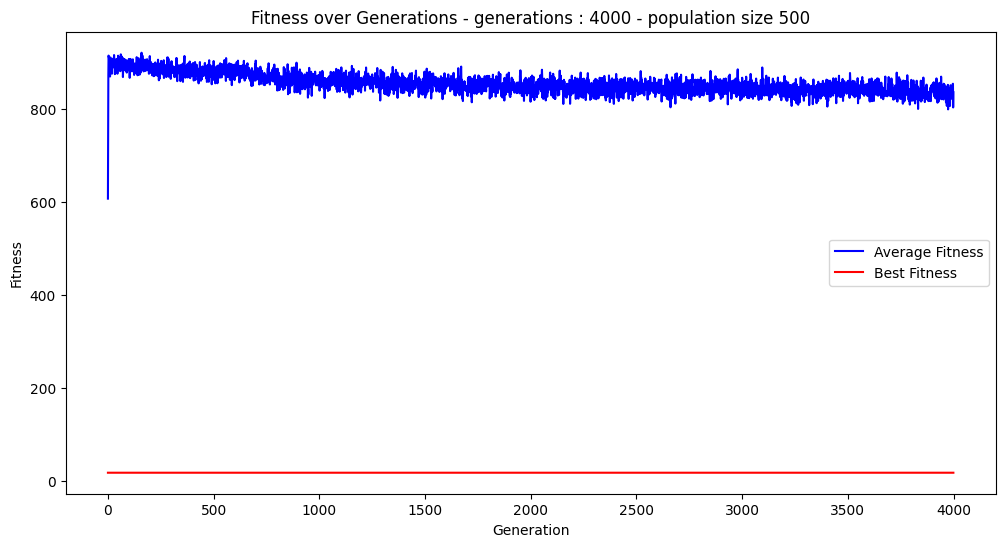

Solved TSP - Time taken: 998.979
([12, 15, 11, 9, 10, 1, 8, 4, 6, 3, 14, 2, 7, 17, 13, 5, 0, 16], 18)


In [5]:
# GA using ACO to find Best Routes (not properly implemented yet)
tsp_data = TSPData.read_specification(coordinates=coordinate_file, product_file=product_file)
start_time_route = int(round(time.time() * 1000))

tsp_data.calculate_routes(aco)
print("Calculated Routes - Time taken: " + str((int(round(time.time() * 1000)) - start_time_route) / 1000.0))

ga = GeneticAlgorithm(generations, population_size, seed)
start_time_ga = int(round(time.time() * 1000))

solution = ga.solve_tsp(tsp_data, plot_avg=True, plot_best=True)
print("Solved TSP - Time taken: " + str((int(round(time.time() * 1000)) - start_time_route) / 1000.0))
print(solution)